In [1]:
import pandas as pd 
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, MaxPooling2D, BatchNormalization, Dropout
import numpy as np
import cv2 
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [2]:
image_size = (104,104)
batch_size = 32

In [3]:
def сorrecting_data():
    x = []
    y = []
    boxes = []
    df = pd.read_csv('_annotations.csv') 
#     df['xmin'] = df['xmin'].apply(lambda x: x // 4)
#     df['ymin'] = df['ymin'].apply(lambda x: x // 4)
#     df['xmax'] = df['xmax'].apply(lambda x: x // 4)
#     df['ymax'] = df['ymax'].apply(lambda x: x // 4)
#     df['width'] = df['width'].apply(lambda x: x // 4)
#     df['height'] = df['height'].apply(lambda x: x // 4)
    for x1,y1,x2,y2 in zip(df['xmin'].apply(lambda x: x // 4), list(df['ymin'].apply(lambda x: x // 4)), 
                       list(df['xmax'].apply(lambda x: x // 4)), list(df['ymax'].apply(lambda x: x // 4))):
        arr = [x1, y1, x2, y2]
        boxes.append(arr)
    return df, boxes

In [4]:
def _data(df):
    x = []
    y = []
    boxes = []
    for index, g in df.iterrows():
        if (df['height'][index] !=  0) and (df['width'][index] !=  0):
            break
        else:
            boxes.append([0,0,0,0])
    for x1,y1,x2,y2 in zip(df['xmin'], list(df['ymin']), 
                   list(df['xmax']), list(df['ymax'])):
        arr = [x1, y1, x2, y2]
        boxes.append(arr)
    return boxes

In [5]:
def data_metrics(df,boxes):
    images = []
    coordinates = []
    
    for index, boxes in df.iterrows():
        image = cv2.imread(index)
        images.append(image)
        coordinates.append(boxes)
    return images, coordinates

In [6]:
# Масштабирование и преобразование извлеченных областей
def data(images, coordinates, image_size):
    scaled_regions = []
    labels = []
    for image, coords in zip(images, coordinates):
        x, y, w, h = coords
        car_region = image[y:y+h, x:x+w]
        scaled_region = cv2.resize(car_region, image_size)
        scaled_regions.append(scaled_region)
        labels.append(1)  # Предполагая, что все извлеченные области - это машины
        # Преобразование входных данных в массивы NumPy
    # Преобразование входных данных в массивы NumPy
    scaled_regions = np.array(scaled_regions)
    labels = np.array(labels)
    return scaled_regions, labels


In [7]:
# Масштабирование и преобразование извлеченных областей
def data_test_fun(images, coordinates, image_size):
    scaled_regions = []
    labels = []
    for image, coords in zip(images, coordinates):
        x, y, w, h = coords
        if x + y + w + h != 0:
            car_region = image[y:y+h, x:x+w]
            scaled_region = cv2.resize(car_region, image_size)
            scaled_regions.append(scaled_region)
            labels.append(1)  # Предполагая, что все извлеченные области - это машины
            # Преобразование входных данных в массивы NumPy
        else:
            scaled_region = cv2.resize(image, image_size)
            scaled_regions.append(scaled_region)
            labels.append(0)  # Предполагая, что все извлеченные области - это не машины
    
    # Преобразование входных данных в массивы NumPy
    scaled_regions = np.array(scaled_regions)
    labels = np.array(labels)
    return scaled_regions, labels

In [8]:
def data_trash_preparation(df):
    images = []
    
    for index, boxes in df.iterrows():
        image = cv2.imread(index)
        images.append(image)
    return images

In [9]:
def data_trash(images, image_size):
    scaled_regions = []
    labels = []
    for image in images:
        scaled_region = cv2.resize(image, image_size)
        scaled_regions.append(scaled_region)
        labels.append(0)  # Предполагая, что все извлеченные области - это машины
    # Преобразование входных данных в массивы NumPy
    scaled_regions = np.array(scaled_regions)
    labels = np.array(labels)
    return scaled_regions, labels

In [10]:
df_trash = pd.DataFrame({'filename': os.listdir('DataSet_cars_valid\\1_trash')})
df_trash = df_trash.set_index('filename')
df_trash = df_trash.astype(str)

In [11]:
# %cd DataSet_cars_train/train_1_test
# df_train, boxes_train = сorrecting_data()
# df_train = df_train.set_index('filename')
# train = pd.concat([df_train, df_trash])
# train = train.fillna(0)
# boxes_train = _data(train)
# image_train, image_coords = data_metrics(train, boxes_train)
# %cd ../..


In [12]:
%cd DataSet_cars_valid/valid_test
df_train, boxes_train = сorrecting_data()
df_train = df_train.set_index('filename')
train = pd.concat([df_train, df_trash])
train = train.fillna(0)
boxes_train = _data(train)
image_train, image_coords = data_metrics(train, boxes_train)
%cd ../..


C:\Users\Matvey\Проект\Project\DataSet_cars_valid\valid_test
C:\Users\Matvey\Проект\Project


In [13]:
# %cd DataSet_cars_valid/valid
# df_valid, boxes_valid = сorrecting_data()
# df_valid = df_valid.set_index('filename')
# # df = df_valid.astype(str)
# image_valid, image_coords = data_metrics(df_valid, boxes_valid)
# %cd ../..

In [14]:
boxes_train = np.array(boxes_train)
boxes_train = boxes_train.astype(np.int)
boxes_train = boxes_train.tolist()

C:\Users\Matvey\AppData\Local\Temp\ipykernel_15488\841383010.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  boxes_train = boxes_train.astype(np.int)


In [15]:
# %cd DataSet_cars_train/1_trash
# image_trash = data_trash_preparation(df_trash)
# %cd ../..

In [16]:
region_train, car_train = data_test_fun(image_train, boxes_train, image_size)

In [42]:
test = tf.convert_to_tensor(region_train[5])


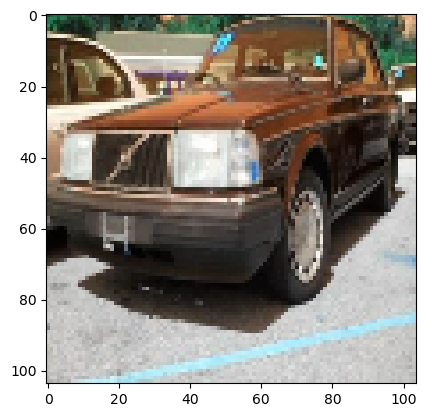

In [43]:
plt.imshow(test, cmap='gray')
plt.show()

In [23]:
# region_val, car_val = data_test_fun(image_valid,boxes_valid, image_size)

In [17]:
model = keras.Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(104,104,3)),  # свёрточный слой
    #попробуй по 2-3 свёрточных слоя сделать
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

#     Conv2D(128, (3, 3), activation='relu'),  # свёрточный слой
#     MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
#     Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(256, (3, 3), activation='relu'),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

#     Conv2D(256, (3, 3), activation='relu'),  # свёрточный слой
#     MaxPooling2D((2, 2), strides=2),  # уменьшеи карт признаков
#     Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(512, (3, 3), activation='relu'),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

#     Conv2D(512, (3, 3), activation='relu'),  # свёрточный слой
#     MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
#     Dropout(0.2),  # отключение 20 процентов нейронов

    Flatten(),
    Dense(512, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключение 20 процентов нейронов
    Dense(256, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключение 20 процентов нейронов
    Dense(128, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключение 20 процентов нейронов
    Dense(1, activation='sigmoid'),  # выходной слой
])


In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
train_data, val_data, train_labels, val_labels = train_test_split(
    region_train, car_train, test_size=0.2, random_state=42)

In [21]:
#del region_valid
del region_train
#del car_valid
#del car_train
del df_train
del boxes_train
del df_trash
del image_train
del image_coords

In [20]:
history = model.fit(train_data, train_labels, epochs = 60, batch_size = batch_size, validation_data = (val_data, val_labels))

Epoch 1/60
129/129 [==============================] - 11s 48ms/step - loss: 5.8634 - accuracy: 0.6570 - val_loss: 0.4870 - val_accuracy: 0.7977
Epoch 2/60
129/129 [==============================] - 5s 41ms/step - loss: 0.4255 - accuracy: 0.8173 - val_loss: 0.3198 - val_accuracy: 0.8521
Epoch 3/60
129/129 [==============================] - 5s 41ms/step - loss: 0.3459 - accuracy: 0.8570 - val_loss: 0.3373 - val_accuracy: 0.8638
Epoch 4/60
129/129 [==============================] - 5s 41ms/step - loss: 0.3298 - accuracy: 0.8648 - val_loss: 0.3190 - val_accuracy: 0.8813
Epoch 5/60
129/129 [==============================] - 5s 41ms/step - loss: 0.3000 - accuracy: 0.8820 - val_loss: 0.2701 - val_accuracy: 0.8988
Epoch 6/60
129/129 [==============================] - 5s 41ms/step - loss: 0.2892 - accuracy: 0.8966 - val_loss: 0.2566 - val_accuracy: 0.9115
Epoch 7/60
129/129 [==============================] - 5s 41ms/step - loss: 0.2231 - accuracy: 0.9163 - val_loss: 0.2637 - val_accuracy: 0.901

Epoch 58/60
129/129 [==============================] - 6s 43ms/step - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.4991 - val_accuracy: 0.9436
Epoch 59/60
129/129 [==============================] - 6s 43ms/step - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.3591 - val_accuracy: 0.9300
Epoch 60/60
129/129 [==============================] - 6s 43ms/step - loss: 0.0267 - accuracy: 0.9920 - val_loss: 0.6404 - val_accuracy: 0.9329


In [23]:
model.save('metrics_test_val_60.h5')

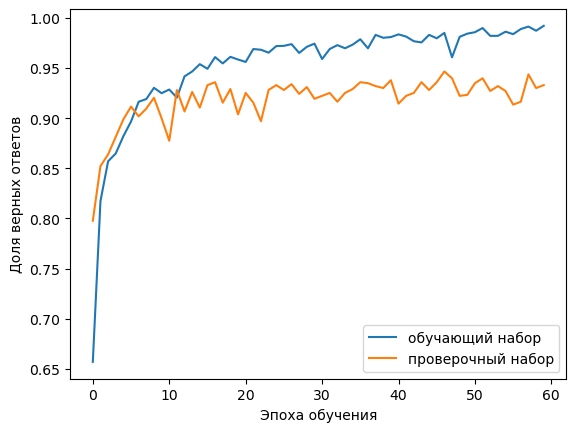

In [22]:
plt.plot(history.history['accuracy'],
         label='обучающий набор')
plt.plot(history.history['val_accuracy'],
         label='проверочный набор')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()